In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
import re

#pd.set_option('max_columns', 500)

# For plotting
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle= cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## Load in the Dataset

In [2]:
tweets = pd.read_csv('/Users/lagarto/Documents/AnalyticaSolutions/Portfolio/Data_Science/DS_Wordle_tweets/tweets.csv')

In [3]:
def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10]
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')
    tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')
    return tweets

tweets = process_tweets(tweets)

## How many tweets do we have for each date

### Make the tweets_count a data frame to plot it.

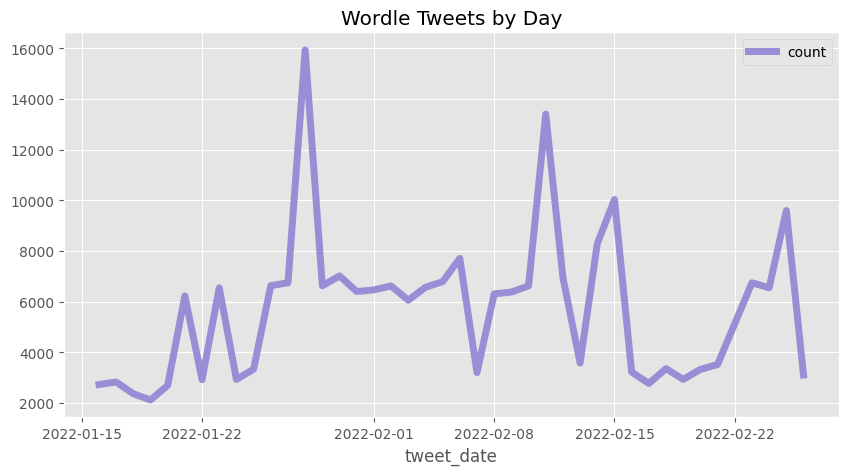

In [4]:
tweets_count = pd.DataFrame(tweets['tweet_date'].value_counts())\
    .sort_values(by='tweet_date')\
    .plot(figsize=(10, 5), title= 'Wordle Tweets by Day', color=color_pal[2], lw=5)
plt.show()

### Alternatively sort by index the series

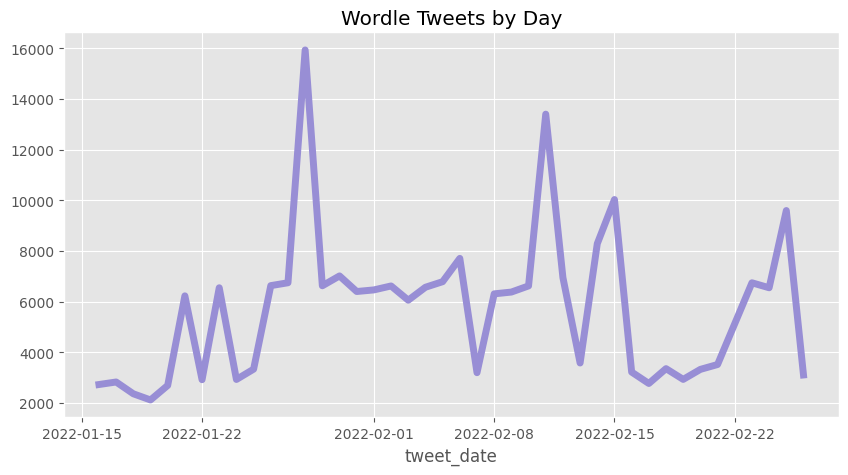

In [5]:
tweets['tweet_date'].value_counts().sort_index()\
    .plot(figsize=(10, 5), title= 'Wordle Tweets by Day', color=color_pal[2], lw=5)
plt.show()

## Number of attempts analysis

In [6]:
tweets.groupby('wordle_id')['n_attempts'].value_counts()\
    .unstack()\
    .style.background_gradient(axis=1)

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


## How many attempts does it usually take to solve?

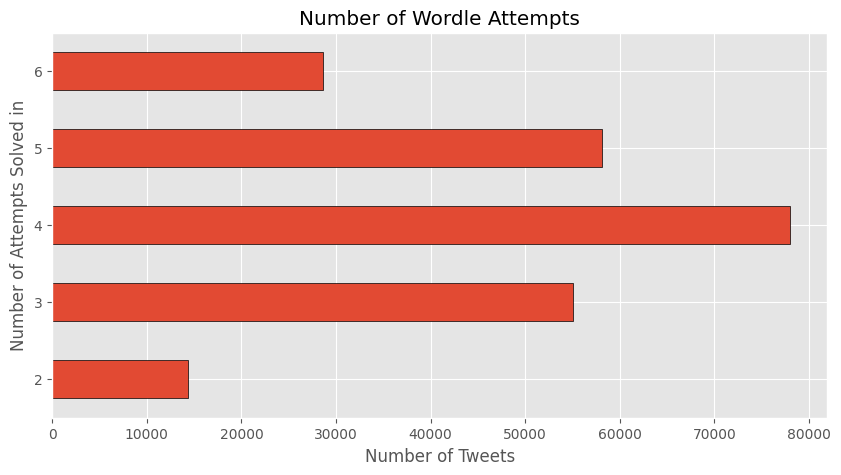

In [7]:
ax =tweets['n_attempts'].value_counts()\
    .sort_index()\
    .plot(figsize=(10,5),
          kind= 'barh',
          title='Number of Wordle Attempts',
          edgecolor='black'
          )
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of Attempts Solved in')
plt.show()

## Parse Tweet Text

In [8]:
#Make dark squares consistent
tweets['tweet_text']= tweets['tweet_text'].str.replace ('⬜','⬛')

In [9]:
def parse_tweet_text(tweets):
    for n in range(6):
        n +=1
        tweets[f'has_guess{n}']= tweets['tweet_text'].str.split('\n').str[n+1] \
            .str.contains('|'.join(['🟨', '⬛','🟩'])) \
            .fillna(False)
        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
            tweets['tweet_text'].str.split('\n').str[n + 1].str[:5]
        # Count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'],
                        f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')
        tweets.loc[tweets[f'has_guess{n}'],
                        f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('🟨')
        tweets.loc[tweets[f'has_guess{n}'],
                        f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')

        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets

tweets = parse_tweet_text(tweets)

/var/folders/xx/nk_6t7cj2qdgn6rh_jg65lzm0000gp/T/ipykernel_5251/3634175154.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/var/folders/xx/nk_6t7cj2qdgn6rh_jg65lzm0000gp/T/ipykernel_5251/3634175154.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/var/folders/xx/nk_6t7cj2qdgn6rh_jg65lzm0000gp/T/ipykernel_5251/3634175154.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future

In [10]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,...,has_guess5,guess5,guess5_incorrect,guess5_wrong_spot,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_wrong_spot,guess6_correct
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210,True,⬛⬛🟨🟨⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210,True,⬛⬛⬛⬛⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210,True,⬛⬛⬛🟨⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210,True,⬛⬛🟨⬛⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210,True,⬛⬛🟨⬛⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [12]:
# Keep additional tweet text
tweets['additional_text']=\
    tweets.loc[~tweets['tweet_text']\
        .str.split('\n').str[-1].str.contains('🟩')]\
        ['tweet_text'].str.split('\n').str[-1]

In [13]:
tweets

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,...,guess5,guess5_incorrect,guess5_wrong_spot,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_wrong_spot,guess6_correct,additional_text
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210,True,⬛⬛🟨🟨⬛,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210,True,⬛⬛⬛⬛⬛,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210,True,⬛⬛⬛🟨⬛,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210,True,⬛⬛🟨⬛⬛,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210,True,⬛⬛🟨⬛⬛,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234181,Wordle 251,1497413074709590024,2022-02-26,SammieLee14,Wordle 251 6/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n⬛⬛🟨⬛⬛\n⬛🟩⬛⬛⬛\n...,2022-02-26 03:27:52+00:00,6,251,True,⬛⬛⬛⬛⬛,...,⬛🟩🟨⬛⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,NaN
234182,Wordle 251,1497413096457097218,2022-02-26,real_hotaru,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n🟨⬛🟨⬛⬛\n⬛⬛🟨⬛⬛\n...,2022-02-26 03:27:57+00:00,5,251,True,⬛⬛⬛⬛⬛,...,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,Bruh
234183,Wordle 251,1497413098210222084,2022-02-26,mmelmazz,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛🟩⬛⬛⬛\n🟨🟩⬛⬛⬛\n⬛🟩🟩🟩🟩\n...,2022-02-26 03:27:57+00:00,5,251,True,⬛⬛⬛⬛⬛,...,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,NaN
234184,Wordle 251,1497413110725943298,2022-02-26,Ancient_Wonder,Wordle 251 3/6\n\n⬛⬛🟩⬛⬛\n🟩🟩⬛🟩⬛\n🟩🟩🟩🟩🟩,2022-02-26 03:28:00+00:00,3,251,True,⬛⬛🟩⬛⬛,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


# Plot Result by Attempt

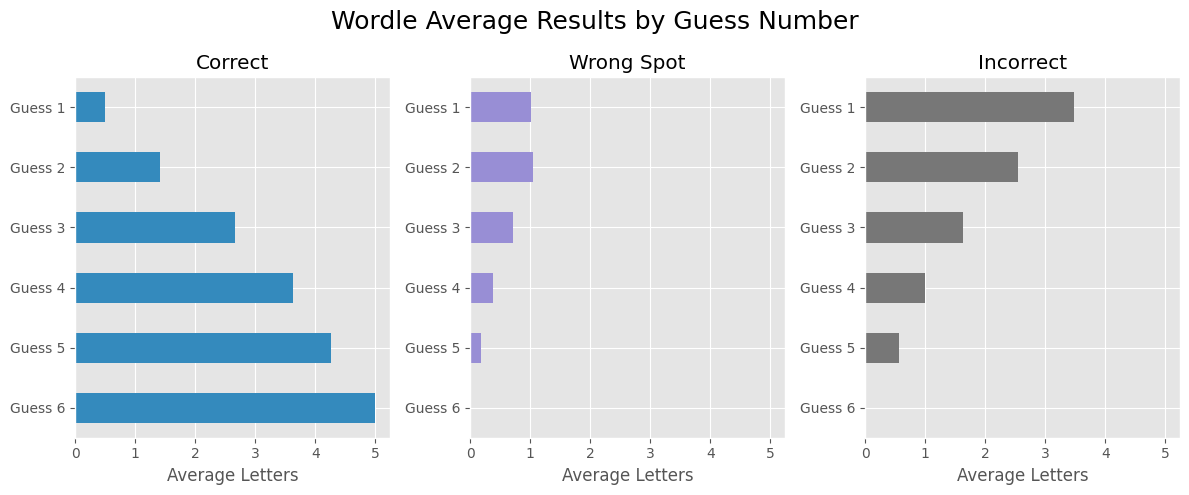

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)

for i, x in enumerate(['_correct','_wrong_spot','_incorrect']):
    col_subset = [c for c in tweets.columns if x in c]
    guess_avg = tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind='barh',
              title=f'{x.strip("_").replace("_"," ").title()}',
              ax=axs[i],
              color=color_pal[i+1])
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number', fontsize=18)
plt.tight_layout()
plt.show()